<a href="https://colab.research.google.com/github/sonaliliyanahetti/Prediction/blob/main/Multiple_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Petrol consumption of a country under various factors such as tax,distance of highways and population with driving licence

Input:Tax,distance of highways,average inome,population with driving licence

output:Expected petrol consumption

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv('/content/drive/MyDrive/Classroom/w1_petrol_consumption-220925-152435.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [10]:
data.shape

(48, 5)

In [11]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


Text(0, 0.5, 'Petrol_Consumption')

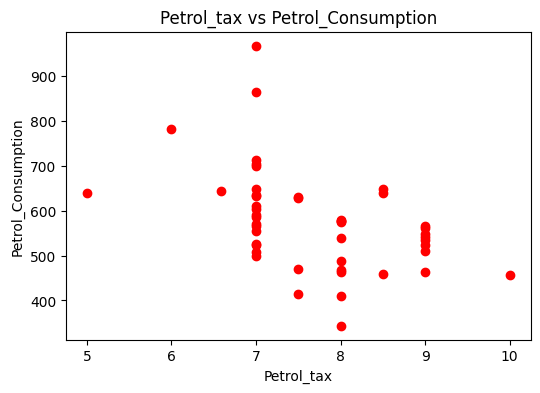

In [15]:
plt.figure(figsize=(6,4))
plt.plot(data['Petrol_tax'],data['Petrol_Consumption'],'ro')
plt.title('Petrol_tax vs Petrol_Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')

week linear relationship

Text(0, 0.5, 'Petrol_Consumption')

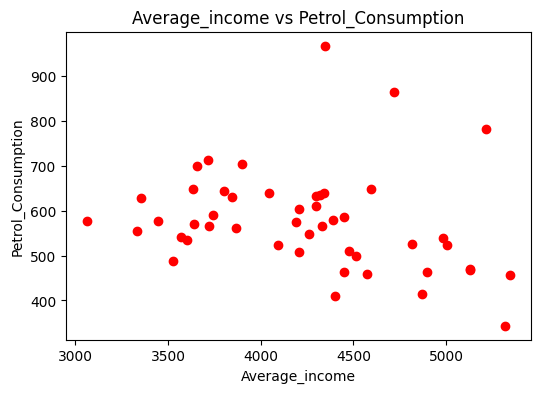

In [16]:
plt.figure(figsize=(6,4))
plt.plot(data['Average_income'],data['Petrol_Consumption'],'ro')
plt.title('Average_income vs Petrol_Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')

Train Model

In [25]:
Y=data['Petrol_Consumption']
X=data[['Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_tax']]

In [26]:
from sklearn.model_selection import train_test_split #to devide test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)#by providing fixed number we can gain same set of test and training

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [28]:
model.intercept_

361.45087906668397

In [29]:
model.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

Make predictions

In [31]:
y_pred=model.predict(X_test)

In [32]:
results=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})
results

,Actual,Predicted
27,631,606.692665
40,587,673.779442
26,577,584.991490
43,591,563.536910
24,460,519.058672
37,704,643.461003
12,525,572.897614
19,640,687.077036
4,410,547.609366
25,566,530.037630


Evaluate the model


In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(Y_test,y_pred)
MSE=mean_squared_error(Y_test,y_pred)
RMSE=np.sqrt(MSE)

print('MAE:',MAE)
print('MSE:',MSE)
print('RMSE:',RMSE)

MAE: 53.46854128290797
MSE: 4083.2558717442635
RMSE: 63.9003589328281


In [34]:
model.score(X_test,Y_test)

0.39136640014305457

In [35]:
model.score(X_train,Y_train)

0.7068781342155135

train data are almost good and equal to the 1 but when we try prediction in new data it is very poor.

reasons:

providing small amount of data.

may be it is a non linear relationship


(generalization)
